In [3]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import titanic dataset
titanic_data = pd.read_csv("titanic_data.csv") 
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


- Look at the code below, what happened here?... 


In [4]:
titanic_data['age'] = pd.to_numeric(titanic_data['age'], errors = 'coerce')
titanic_data.dropna(inplace = True)
titanic_data = titanic_data[titanic_data['age'] > 1]
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C,?,124,"New York, NY"


In [5]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1024 non-null   int64  
 1   survived   1024 non-null   int64  
 2   name       1024 non-null   object 
 3   sex        1024 non-null   object 
 4   age        1024 non-null   float64
 5   sibsp      1024 non-null   int64  
 6   parch      1024 non-null   int64  
 7   ticket     1024 non-null   object 
 8   fare       1024 non-null   object 
 9   cabin      1024 non-null   object 
 10  embarked   1024 non-null   object 
 11  boat       1024 non-null   object 
 12  body       1024 non-null   object 
 13  home.dest  1024 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 120.0+ KB


## Categorical Data

- Categorical values: Typically, any feature which is categorical in nature represents distinctive values which belong to a specific finite set of categories or classes.


A categorical variable takes only a limited number of values.

    - Consider a survey that asks how often you eat breakfast and provides four options: "Never", "Rarely", "Most days", or "Every day". In this case, the data is categorical, because responses fall into a fixed set of categories.
    - If people responded to a survey about which what brand of car they owned, the responses would fall into categories like "Honda", "Toyota", and "Ford". In this case, the data is also categorical

These are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)...Categorical
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)...categorical
- **Name**: Name of passenger...Categorical
- **Sex**: Sex of the passenger....Categorical
- **Age**: Age of the passenger (Some entries contain `?`)....Quantitative/Numerical
- **SibSp**: Number of siblings and spouses of the passenger aboard...Numerical
- **Parch**: Number of parents and children of the passenger aboard...Numerical
- **Ticket**: Ticket number of the passenger....numerical
- **Fare**: Fare paid by the passenger...numerical
- **Cabin** Cabin number of the passenger (Some entries contain `?`)...categorical
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)....categorical

Now that we know exactly which features are categorical, we want to understand what these features look like...


In [6]:
# Print count and values of each categorical feature
print(titanic_data.survived.value_counts())
print(titanic_data.pclass.value_counts())
print(titanic_data.cabin.value_counts())
print(titanic_data.sex.value_counts())

0    614
1    410
Name: survived, dtype: int64
3    487
1    283
2    254
Name: pclass, dtype: int64
?                  755
C23 C25 C27          6
B57 B59 B63 B66      5
B96 B98              4
C78                  4
                  ... 
A29                  1
B3                   1
C130                 1
C90                  1
E77                  1
Name: cabin, Length: 175, dtype: int64
male      645
female    379
Name: sex, dtype: int64


### Consistency

Note that for ***cabin*** we have several instances of the "?" category. The data is incomplete and inconsistent.

- It is important that we identify this inconsistencies, remove them or modify them. Not doing so will cause our model to predict incorrectly.



#### Quick Introduction to histograms....

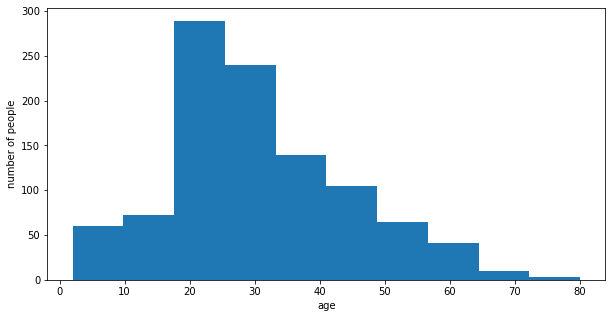

In [7]:
# Create a histogram
_ = plt.hist(titanic_data['age'], bins=10 )
_ = plt.xlabel('age')
_ = plt.ylabel('number of people')
fig = plt.gcf()
fig.set_size_inches(10, 5)

- Note that the histogram is very hard to read
- Note that plt.hist returns 3 arrays, but we only want a plot therefore we assign these to a dummy variable _
- The number of bins and thier size was assigned automatically by the default settings of plt.hist()
- we can specify the bins to modify the plot and make it more readable


### Review of Statistics...
- Mean: The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set.
- Median: The median is the middle value when a data set is ordered from least to greatest. 

In [8]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,2.199219,0.400391,30.505371,0.488281,0.398438
std,0.844370,0.490217,13.916548,0.898494,0.831584
min,1.000000,0.000000,2.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.250000
max,3.000000,1.000000,80.000000,8.000000,6.000000


### Percentiles, Outliers and Box Plots

It is important that we understand what the data is trying to tell us. For this reason we use the statistics...

- The mean might not represent the data as well as we expect because it can be impacted by outliers
- **Outliers**: data points which are much much bigger or smaller than the rest of the data
- The Median is not affected by the issue of outliers.

***Percentiles***
- Percentiles indicate the percent of data that fall below that number.

For Example: 
    - If we say that 28 is the 50th percentile of the age data (in the case of the titanic), then 50% of all age data is found below 30
    
In python we can further explore percentiles using the numpy function '.percentile()'...

In [9]:
# calculate percentiles
age_percentiles = np.percentile(titanic_data['age'], [25, 50, 75])

# Print the result
print(age_percentiles)

[21. 28. 39.]


### Box Plot
We can graph the percentiles of the data using a box plot
- Note that the box represents the inner 50% of the data
- The bottom part of the box represents the value at which you will find the botton 25 of the data, the middle represents the 50th percentile and the top the 75th percentile
- In the example below we can see that
    - 25% of the people in the boat had less than 28 years of age
    - 75% of the people in the boat had less than 65 years of age


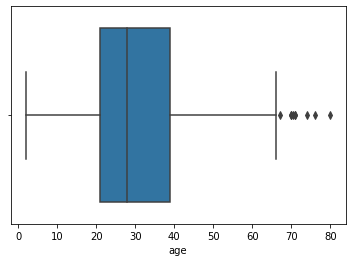

In [10]:
# Graph the box plot the age data

# import seaborn

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='age',data=titanic_data)

# Label the axes
_ = plt.xlabel('age')

#ax = sns.boxplot(x=tips["total_bill"])

# Show the plot
plt.show()

### Outliers

- With our understanding of percentiles we can now better and more precisely define outliers
- Outliers are typically those values that are 1.5 x the height of the box or inner 50% of the data
    - data points sitting outside of the wiskers are concidered to be outliers
    - in this example those passengers with ages above 70 can be concidered outliers
    - we can now remove those passengers with ages above 70, and recalcuate a new average that is more representative of the average age of passengers
   
    

In [11]:
# Remove outliers
df_no_outliers = titanic_data[titanic_data['age'] < 65]

# Calculate mean
df_no_outliers.describe()

,pclass,survived,age,sibsp,parch
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,2.206726,0.403561,29.997033,0.491592,0.401583
std,0.841847,0.490854,13.249024,0.902515,0.835451
min,1.000000,0.000000,2.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000
75%,3.000000,1.000000,38.250000,1.000000,1.000000
max,3.000000,1.000000,64.000000,8.000000,6.000000


- Note that the mean age has decreased slightly, although this is very minimal it may contribute to the overall predictive performance of your model in a big way (we will explore this later)
- We will also note that the histogram has changed conciderably...

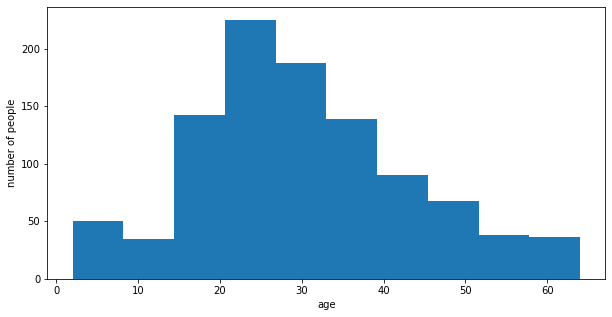

In [12]:
# Create a new histogram
_ = plt.hist(df_no_outliers['age'], bins=10)
_ = plt.xlabel('age')
_ = plt.ylabel('number of people')
fig = plt.gcf()
fig.set_size_inches(10, 5)

- But now that the histogram has changed, how should we interpret this histogram?...lets talk about data distributions


***

**Data Distribution**

***

A distribution is a representation of possible values (or intervals) of the data. It also (and this is important) tells you how often each value occurs. Often, the data in a distribution will be ordered from smallest to largest, and graphs and charts allow you to easily see both the values and the frequency with which they appear.
 
1. The histogram we created generates a view of the *distribution* of ages across the passagers that traveled in the Titanic
2. Based on the histogram we generated we can safely say that if we picked any passenger at random, it is very likely that this passenger is between the ages of 20 to 30 (since most passengers in the titanic dataset are between the ages of 20 to 30)

    a. Logically we know that the probability of any particular outcome increases with the increase in the number of instances we see that outcome
    



Why do we have to be very careful about what data distributions tell us?

    - If we were to predict whether or not a passenger is likely to survive by only considering the age of the passenger then we would have inaccurate results because if we looked at the data most of the passengers that survived are between 20 to 30 years old simply because that is the most common age
    - In this case we would say that the results are SKEWED aka based, misleading or inaccurate

Note that since each of these features is taken into consideration by our machine learning model, the feature's distribution distributed might tell us why our model made a particular prediction

### Missing Values
Your data may always come incomplete, therefore it is important to know how to deal with missing data
  


- Lets imagine that our titanic data was corrupted and for some reason there were null (empty values) everywhere you find 21 under age


- What impact will this have on our model...
    - what impact does this have on the statistics of age?
    

In [13]:
# Remove age 29 and replace with nan
# First define a series with that has all values that equal 29 replaced with nan
#df_no_outliers.loc[df_no_outliers[df_no_outliers['age']==29]] = np.nan
age_wo_29 = titanic_data['age'].replace(29, np.nan)

# Add the newly defined series as a column in our titanic dataframe
df_no_outliers['age'] = age_wo_29

df_no_outliers.head(100)

<ipython-input-13-2cb4b26e78ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['age'] = age_wo_29


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,NaN,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.55,E12,S,3,?,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263,C23 C25 C27,S,10,?,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263,C23 C25 C27,S,10,?,"Winnipeg, MB"
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263,C23 C25 C27,S,?,?,"Winnipeg, MB"
115,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263,C23 C25 C27,S,?,?,"Winnipeg, MB"


In [14]:
# calculate new statistics
df_no_outliers.describe()

,pclass,survived,age,sibsp,parch
count,1011.000000,1011.000000,981.000000,1011.000000,1011.000000
mean,2.206726,0.403561,30.027523,0.491592,0.401583
std,0.841847,0.490854,13.449120,0.902515,0.835451
min,1.000000,0.000000,2.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000
max,3.000000,1.000000,64.000000,8.000000,6.000000


In [ ]:
# Create a new histogram
_ = plt.hist(df_no_outliers['age'], bins=10)
_ = plt.xlabel('age')
_ = plt.ylabel('number of people')
fig = plt.gcf()
fig.set_size_inches(10, 5)

### Date Time

- Machine learning model might benefit from date and time features. Therefore it is important to know how to work with date data

***datetime***

the dateime module is part of the python standard library    


In [ ]:
# Import datetime
import datetime as dt

# Import data with datetime (appointment data from a doctor's office)
date_df = pd.read_csv("datetime_data.csv")
date_df.head()

In [ ]:
date_df.info()


- Note that date features like "AppointmentDay" and "ScheduledDay" seem to be "object" instead of date time.
- This is the case beause  pandas is currently looking at these values as strings instead of dates
- To convert these features into datetime we cans simply use the pandas function to_datetime

In [ ]:
# Convert AppointmentDay into datetime
date_df['AppointmentDay'] = pd.to_datetime(date_df['AppointmentDay'])

# Convert AppointmentDay into datetime
date_df['ScheduledDay'] = pd.to_datetime(date_df['AppointmentDay'])

date_df.info()

Now that you have these values with datetime type, you can use them to create a better analysis.
- datetime64 has several properties in pandas that we can now use 

link:https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties


Lets use some of this properties...

In [ ]:
# Create a new field that tells us the year in which each appointment was set
date_df['year_set'] = date_df['ScheduledDay'].dt.year

# Create a new field that tells us which day of the year the appointment was set
date_df['day_num'] = date_df['ScheduledDay'].dt.dayofyear

date_df.sort_values(by=['Age']).head(26)